Importar las librerías necesarias.

In [196]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn import preprocessing
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2


Definir una funición para asignar valores 1 ó 0 según la duración de la estadía.

In [197]:
def asignar(i):
    if i > 8:
        return int(1)
    else:
        return int(0)

Análisis del dataset

In [198]:
#Importo el dataset de train para definir el modelo y entrenarlo.
datos_train = pd.read_csv('./hospitalizaciones_train.csv', encoding='utf-8', sep=None, engine='python', decimal='.')

In [199]:
#Realizo un análisis inicial al dataset para ver su composición.
datos_train.info()
datos_train.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  410000 non-null  int64  
 1   Department                         410000 non-null  object 
 2   Ward_Facility_Code                 410000 non-null  object 
 3   doctor_name                        410000 non-null  object 
 4   staff_available                    410000 non-null  int64  
 5   patientid                          410000 non-null  int64  
 6   Age                                410000 non-null  object 
 7   gender                             410000 non-null  object 
 8   Type of Admission                  410000 non-null  object 
 9   Severity of Illness                410000 non-null  object 
 10  health_conditions                  410000 non-null  object 
 11  Visitors with Patient              4100

0

In [200]:
datos_train.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


In [201]:
#Utilizando Label Encoder convierto las variables categóricas para poder utilizarlas en el modelo.
le = preprocessing.LabelEncoder()

le.fit(datos_train.Department)
datos_train.Department = le.transform(datos_train.Department)

le.fit(datos_train.Ward_Facility_Code)
datos_train.Ward_Facility_Code = le.transform(datos_train.Ward_Facility_Code)

le.fit(datos_train.doctor_name)
datos_train.doctor_name = le.transform(datos_train.doctor_name)

le.fit(datos_train.Age)
datos_train.Age = le.transform(datos_train.Age)

le.fit(datos_train.gender)
datos_train.gender = le.transform(datos_train.gender)

le.fit(datos_train['Type of Admission'])
datos_train['Type of Admission'] = le.transform(datos_train['Type of Admission'])

le.fit(datos_train['Severity of Illness'])
datos_train['Severity of Illness'] = le.transform(datos_train['Severity of Illness'])

le.fit(datos_train.health_conditions)
datos_train.health_conditions = le.transform(datos_train.health_conditions)

le.fit(datos_train.Insurance)
datos_train.Insurance = le.transform(datos_train.Insurance)

In [202]:
#Aplicando la función definida, creo una nueva columna binaria según la duración.
datos_train['Stay long'] = datos_train['Stay (in days)'].apply(asignar)
datis_train = datos_train.drop(columns=['patientid','Visitors with Patient','Stay (in days)'], inplace=True)

In [203]:
#Reviso la nueva estructura del dataset.
datos_train.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,Insurance,Admission_Deposit,Stay long
0,4,2,3,8,0,4,0,1,0,1,1,2966.408696,0
1,4,2,1,8,2,3,0,1,1,2,0,3554.835677,1
2,2,2,1,8,8,2,0,1,0,1,1,5624.733654,0
3,4,2,3,4,7,3,0,2,2,4,0,4814.149231,0
4,2,1,4,2,10,7,1,1,2,1,0,5169.269637,1


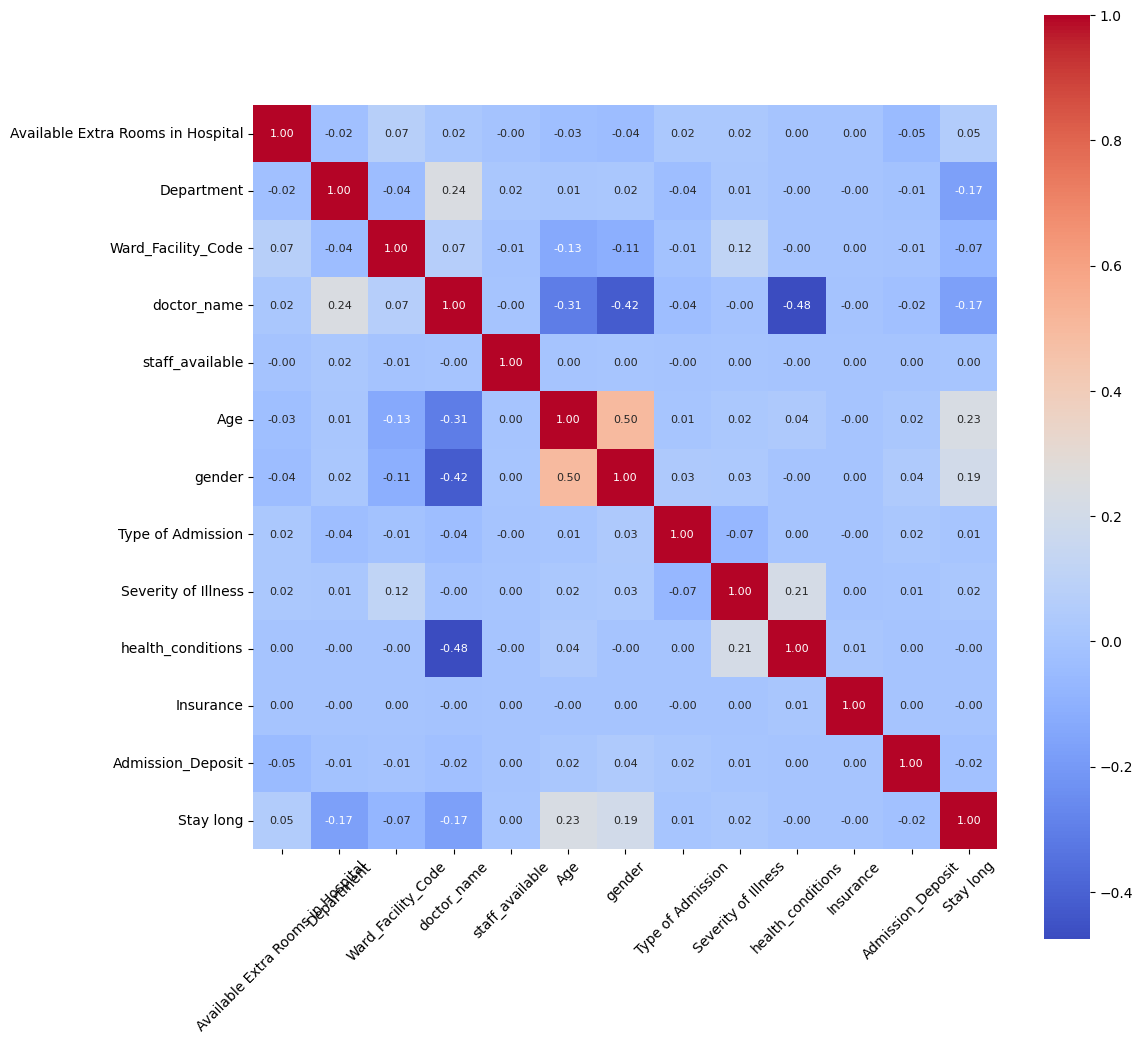

In [204]:
corr = datos_train.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
           xticklabels= datos_train.columns, 
           yticklabels= datos_train.columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks#(rotation = 45)
plt.show()

In [205]:
#Defino X e y utilizando el dataframe resultante.
X = datos_train.iloc[:,0:12]
y = datos_train[['Stay long']]

In [206]:
#Utilzando el train_test_split hago el split de los datos para luego entrenar el modelo.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
arbol = DecisionTreeClassifier(max_depth = 7, random_state=42)
arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [207]:
#Hago que el modelo realice la predicción.
y_train_pred = arbol.predict(X)
y_train_pred

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [208]:
#Calculo el Recall y Accuracy del modelo, 
recall_train = recall_score(y, y_train_pred)
print(f'Recall Train: {recall_test}')
accuracy_train = accuracy_score(y, y_train_pred)
print(f'Accuracy Train: {accuracy_test}')

Recall Train: 0.8063629529865004
Accuracy Train: 0.7068


[Text(0.5056818181818182, 0.9375, 'Age <= 4.5\ngini = 0.47\nsamples = 287000\nvalue = [108127, 178873]'),
 Text(0.48295454545454547, 0.8125, 'Department <= 1.5\ngini = 0.494\nsamples = 242984\nvalue = [108127, 134857]'),
 Text(0.18181818181818182, 0.6875, 'Department <= 0.5\ngini = 0.049\nsamples = 18881\nvalue = [472, 18409]'),
 Text(0.1590909090909091, 0.5625, 'Age <= 2.5\ngini = 0.129\nsamples = 6839\nvalue = [472, 6367]'),
 Text(0.13636363636363635, 0.4375, 'gini = 0.0\nsamples = 1831\nvalue = [0, 1831]'),
 Text(0.18181818181818182, 0.4375, 'Age <= 3.5\ngini = 0.171\nsamples = 5008\nvalue = [472, 4536]'),
 Text(0.09090909090909091, 0.3125, 'Type of Admission <= 1.5\ngini = 0.251\nsamples = 2534\nvalue = [373, 2161]'),
 Text(0.045454545454545456, 0.1875, 'Admission_Deposit <= 4054.38\ngini = 0.277\nsamples = 2137\nvalue = [355, 1782]'),
 Text(0.022727272727272728, 0.0625, 'gini = 0.144\nsamples = 563\nvalue = [44, 519]'),
 Text(0.06818181818181818, 0.0625, 'gini = 0.317\nsamples = 1

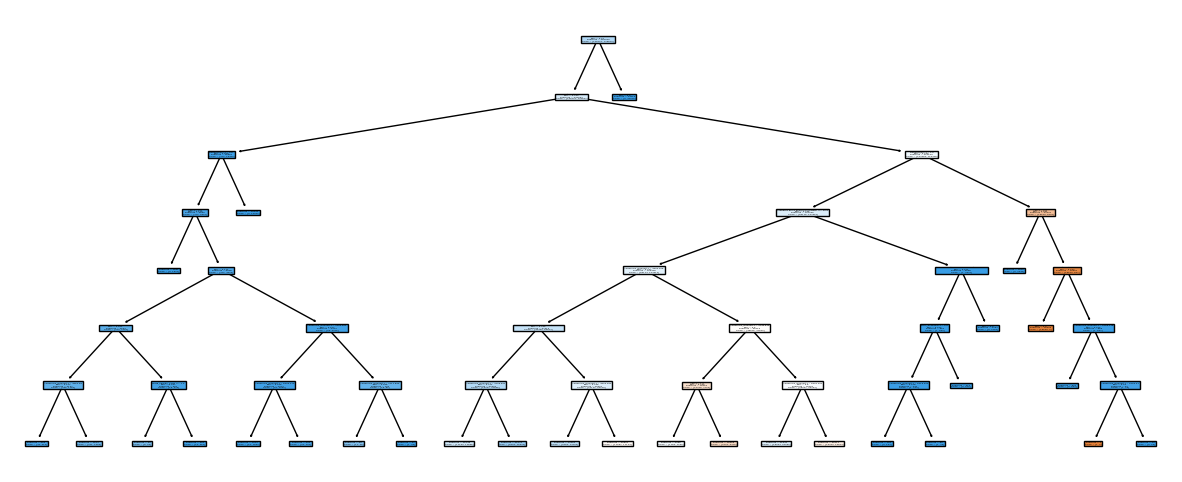

In [209]:
#Grafico el árbol para ver su estructura.
plt.figure(figsize=(15,6))
tree.plot_tree(decision_tree = arbol, feature_names = X_train.columns, filled=True)

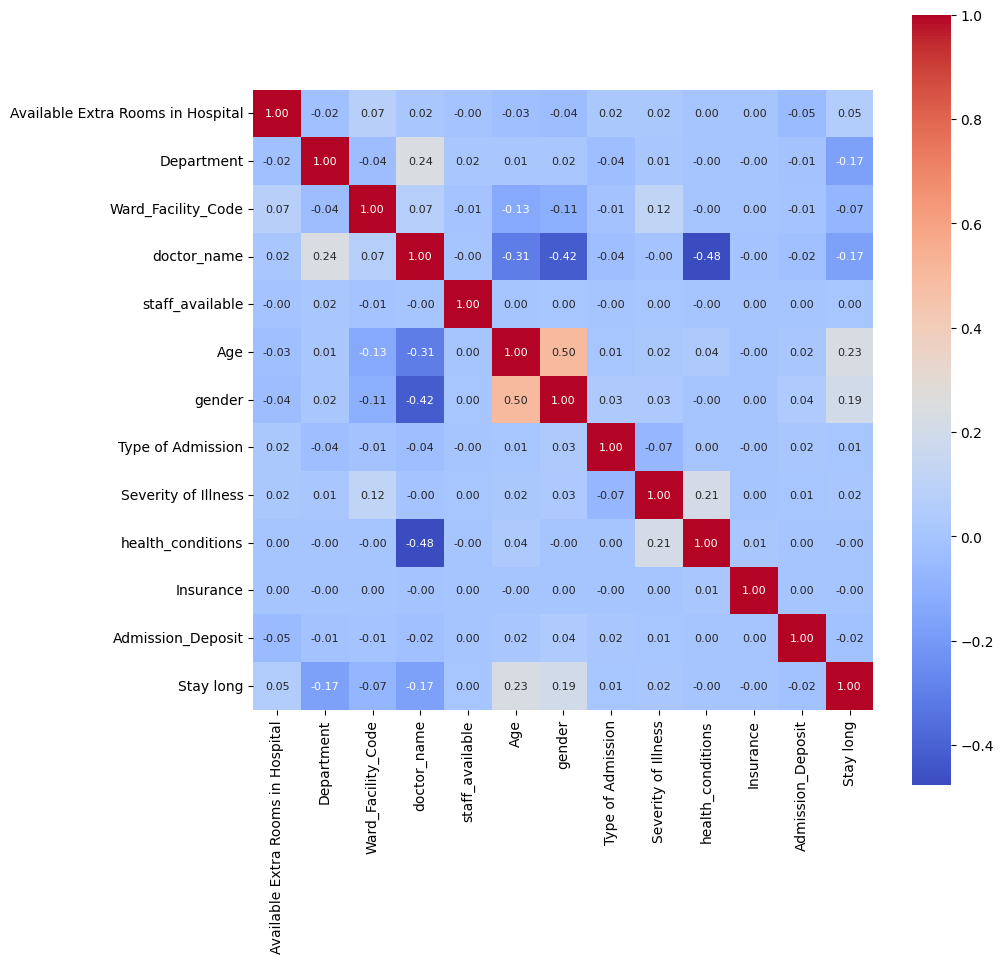

In [212]:
#Aplico un análisis de correlación para ver qué variables pueden ser más útiles al modelo.
corr = datos_train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
           xticklabels= datos_train.columns, 
           yticklabels= datos_train.columns,
           cmap= 'coolwarm')
plt.xticks
plt.yticks
plt.show()

In [213]:
#Pero analiando el dataset, hay variables que podría no incluir en el modelo, y ver si así mejoran los resultados.
X = datos_train[['gender','Age','Department','doctor_name']]
y = datos_train['Stay long']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = DecisionTreeClassifier(random_state=42, max_depth=7)
model.fit(X_train, y_train)
y_train_pred_sel = model.predict(X)
y_train_pred_sel

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [214]:
#Vuelvo a calcular las métricas del modelo.
recall_train_sel = recall_score(y, y_train_pred_sel)
print(f'Recall con selección de variables: {recall_train_sel}')
accuracy_train_sel = accuracy_score(y, y_train_pred_sel)
print(f'Accuracy con selección de variables: {accuracy_train_sel}')
print(f'El Recall mejoró en un: {(recall_train_sel-recall_train)}')
print(f'El Accuracy mejoró en un: {(accuracy_train_sel-accuracy_train)}')

Recall con selección de variables: 0.9670733235192783
Accuracy con selección de variables: 0.687690243902439
El Recall mejoró en un: 0.16071037053277792
El Accuracy mejoró en un: -0.019109756097560937


Aplico el modelo sobre el dataset Test

In [217]:

datos_test = pd.read_csv('./hospitalizaciones_test.csv', encoding='utf-8', sep=None, engine='python', decimal='.')

le = preprocessing.LabelEncoder()
le.fit(datos_test.Department)
datos_test.Department = le.transform(datos_test.Department)
le.fit(datos_test.Ward_Facility_Code)
datos_test.Ward_Facility_Code = le.transform(datos_test.Ward_Facility_Code)
le.fit(datos_test.doctor_name)
datos_test.doctor_name = le.transform(datos_test.doctor_name)
le.fit(datos_test.Age)
datos_test.Age = le.transform(datos_test.Age)
le.fit(datos_test.gender)
datos_test.gender = le.transform(datos_test.gender)
le.fit(datos_test['Type of Admission'])
datos_test['Type of Admission'] = le.transform(datos_test['Type of Admission'])
le.fit(datos_test['Severity of Illness'])
datos_test['Severity of Illness'] = le.transform(datos_test['Severity of Illness'])
le.fit(datos_test.health_conditions)
datos_test.health_conditions = le.transform(datos_test.health_conditions)
le.fit(datos_test.Insurance)
datos_test.Insurance = le.transform(datos_test.Insurance)

X_test = datos_test[['gender','Age','Department','doctor_name']]
y_test_pred = model.predict(X)
y_test_pred

export = pd.DataFrame()
export['pred'] = y_test_pred
export.to_csv('emm-ac.csv', index=False)

In [216]:

recall_test_test = recall_score(y, y_test_pred)
print(f'Recall Test: {recall_test}')
accuracy_test_test = accuracy_score(y, y_test_pred)
print(f'Accuracy Test: {accuracy_test}')

Recall Test: 0.8063629529865004
Accuracy Test: 0.7068
